<a href="https://colab.research.google.com/github/harrymkwn/InfluenceAnalysis/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import re
import string
from scipy import spatial
from sklearn.utils import shuffle 
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

In [28]:
from google.colab import  drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Import

In [29]:
df_train = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Train/clean_all_train.csv')
df_train = df_train
df_train.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,How the fuck Who the heck moved my fridge ...,0.938,anger
1,1,So my Indian Uber driver just called someone t...,0.896,anger
2,2,UK I asked for my parcel to be delivered to a...,0.896,anger
3,3,so ef whichever butt wipe pulled the fire alar...,0.896,anger
4,4,do not join they put the phone down on you ta...,0.896,anger


In [30]:
df_test = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Test/clean_all_test.csv')
df_test = df_test
df_test.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,At the point today where if someone says somet...,0.319,anger
1,1,IT S GAME DAY T MINUS 14Happy ...,0.144,anger
2,2,This game has pissed me off more than any othe...,0.898,anger
3,3,I have just found out it is Candice and not C...,0.271,anger
4,4,if he cannot come to my Mum a 60th after ...,0.646,anger


In [31]:
def find_length(tweet):

  return len(tweet.split())

In [32]:
def remove_numbers(tweet):
  tweet = re.sub('[0-9]+','',tweet)
  return tweet

In [33]:
hash={"anger":[1,0,0,0],"sadness":[0,1,0,0],"joy":[0,0,1,0],"fear":[0,0,0,1]}
def number_category(category):
  return hash[category]

In [34]:
df_train['Encoding'] = df_train['Category'].apply(lambda category : number_category(category))
df_train['Length'] = df_train['Tweets'].apply(lambda tweet : find_length(tweet))
df_train['Tweets'] = df_train['Tweets'].apply(lambda tweet : remove_numbers(tweet))

trainLength = df_train['Length'].max()


In [35]:
df_test['Encoding'] = df_test['Category'].apply(lambda category : number_category(category))
df_test['Length'] = df_test['Tweets'].apply(lambda tweet : find_length(tweet))
df_test['Tweets'] = df_test['Tweets'].apply(lambda tweet : remove_numbers(tweet))

testLength = df_test['Length'].max()


In [36]:
maxLengthOfTweet = trainLength
if testLength > trainLength :
  maxLengthOfTweet = testLength

#shuffal data

In [37]:
def shuffle_efficiently(df_train):
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train.reset_index(drop=True, inplace=True)

  df_train.head(1000)

  return df_train

In [38]:
df_train = shuffle_efficiently(df_train)

df_train.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,2291,hello Miss Lady I am sure today brings you ha...,0.562,joy,"[0, 0, 1, 0]",25
1,2073,May your day be filled with peacelove n laught...,0.792,joy,"[0, 0, 1, 0]",21
2,1302,horrible experience with a company like thi...,0.542,fear,"[0, 0, 0, 1]",13
3,1699,When I walk in darkness of despondency Sc ver...,0.354,fear,"[0, 0, 0, 1]",24
4,1449,n Ropes Cannot believe how rude your cashier ...,0.479,fear,"[0, 0, 0, 1]",21


In [39]:
df_test = shuffle_efficiently(df_test)

df_test.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,2270,Piers Gough on thoroughly lively and imaginati...,0.340,joy,"[0, 0, 1, 0]",19
1,2279,I want my highlight to be so bright that if I ...,0.375,joy,"[0, 0, 1, 0]",27
2,525,She is foaming at the lips the one between her...,0.292,anger,"[1, 0, 0, 0]",16
3,1204,You are welcome and thank to you likewise W...,0.229,fear,"[0, 0, 0, 1]",19
4,685,ramos does what he does best burning haters wi...,0.509,anger,"[1, 0, 0, 0]",11


#using glove word embadding

In [40]:
embeddings_dict = {}
with open("/content/drive/My Drive/InfluenceAnalysis/glove/glove.twitter.27B.25d.txt", 'r', encoding="utf-8") as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector

In [41]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


#Preprocess Data

In [42]:
def tockanizer(tweet):
  tweet = df_train['Tweets'][ind].split()
  return tweet,len(tweet)

In [43]:
tweetslist = []
for ind in df_train.index:
  tweet,length = tockanizer(df_train['Tweets'][ind])
  tweet.extend('x'*(maxLengthOfTweet - length))
  tweetslist.append(tweet)



print(tweetslist)


[['hello', 'Miss', 'Lady', 'I', 'am', 'sure', 'today', 'brings', 'you', 'happiness', 'and', 'laughter', 'use', 'your', 'voice', 'also', 'to', 'make', 'us', 'laugh', 'good', 'knows', 'we', 'need', 'it', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['May', 'your', 'day', 'be', 'filled', 'with', 'peacelove', 'n', 'laughter', 'Have', 'a', 'very', 'nice', 'day', 'full', 'of', 'Success', 'Jummah', 'MubarakðŸ˜‡', 'good', 'morningâ˜•', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['horrible', 'experience', 'with', 'a', 'company', 'like', 'this', 'goldmedal', 'horrible', 'sales', 'person', 'wrong', 'commitmentswrongproduct', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x',

In [44]:
tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  tweetseq.append(temp)

In [45]:
tweetseq[0]

[array([-0.77069  ,  0.12827  ,  0.33137  ,  0.0050893, -0.47605  ,
        -0.50116  ,  1.858    ,  1.0624   , -0.56511  ,  0.13328  ,
        -0.41918  , -0.14195  , -2.8555   , -0.57131  , -0.13418  ,
        -0.44922  ,  0.48591  , -0.6479   , -0.84238  ,  0.61669  ,
        -0.19824  , -0.57967  , -0.65885  ,  0.43928  , -0.50473  ],
       dtype=float32),
 array([-0.65095  ,  0.58883  ,  0.36398  ,  0.0076338, -1.0482   ,
        -0.017406 ,  1.3423   ,  1.4608   , -0.84313  , -0.13631  ,
        -1.2056   , -0.012133 , -3.9971   , -0.11832  ,  0.16832  ,
         0.1527   ,  0.3719   , -0.63506  , -1.0008   ,  0.46798  ,
         0.1151   ,  0.1941   , -0.52576  ,  0.32809  , -0.22761  ],
       dtype=float32),
 array([-6.7922e-01, -1.7328e-02,  6.5937e-01,  3.7354e-02,  3.0027e-02,
        -1.7614e-03,  1.0312e+00,  6.6359e-01, -1.9053e-01, -5.0765e-01,
         1.0631e-02, -2.1594e-01, -3.6361e+00, -8.0803e-01, -2.4874e-01,
        -2.6033e-02,  7.0114e-02, -5.2009e-01, -1.451

#Test Data

In [46]:
testtweetslist = []
for ind in df_test.index:
  tweet,length = tockanizer(df_test['Tweets'][ind])
  tweet.extend('x'*(maxLengthOfTweet - length))
  testtweetslist.append(tweet)



print(testtweetslist)


[['hello', 'Miss', 'Lady', 'I', 'am', 'sure', 'today', 'brings', 'you', 'happiness', 'and', 'laughter', 'use', 'your', 'voice', 'also', 'to', 'make', 'us', 'laugh', 'good', 'knows', 'we', 'need', 'it', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['May', 'your', 'day', 'be', 'filled', 'with', 'peacelove', 'n', 'laughter', 'Have', 'a', 'very', 'nice', 'day', 'full', 'of', 'Success', 'Jummah', 'MubarakðŸ˜‡', 'good', 'morningâ˜•', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['horrible', 'experience', 'with', 'a', 'company', 'like', 'this', 'goldmedal', 'horrible', 'sales', 'person', 'wrong', 'commitmentswrongproduct', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x',

In [47]:
testtweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  testtweetseq.append(temp)

print(testtweetseq[0])

[array([-0.77069  ,  0.12827  ,  0.33137  ,  0.0050893, -0.47605  ,
       -0.50116  ,  1.858    ,  1.0624   , -0.56511  ,  0.13328  ,
       -0.41918  , -0.14195  , -2.8555   , -0.57131  , -0.13418  ,
       -0.44922  ,  0.48591  , -0.6479   , -0.84238  ,  0.61669  ,
       -0.19824  , -0.57967  , -0.65885  ,  0.43928  , -0.50473  ],
      dtype=float32), array([-0.65095  ,  0.58883  ,  0.36398  ,  0.0076338, -1.0482   ,
       -0.017406 ,  1.3423   ,  1.4608   , -0.84313  , -0.13631  ,
       -1.2056   , -0.012133 , -3.9971   , -0.11832  ,  0.16832  ,
        0.1527   ,  0.3719   , -0.63506  , -1.0008   ,  0.46798  ,
        0.1151   ,  0.1941   , -0.52576  ,  0.32809  , -0.22761  ],
      dtype=float32), array([-6.7922e-01, -1.7328e-02,  6.5937e-01,  3.7354e-02,  3.0027e-02,
       -1.7614e-03,  1.0312e+00,  6.6359e-01, -1.9053e-01, -5.0765e-01,
        1.0631e-02, -2.1594e-01, -3.6361e+00, -8.0803e-01, -2.4874e-01,
       -2.6033e-02,  7.0114e-02, -5.2009e-01, -1.4512e-01,  4.3798e

#Data preparation for model

In [48]:
training_padded = np.array(tweetseq)
labels = list(df_train['Encoding'])
training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(training_padded.shape)

(3613, 63, 25)


In [49]:
testtraining_padded = np.array(testtweetseq)
testlabels = list(df_test['Encoding'])
testtraining_labels = np.array(testlabels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(testtraining_padded.shape)

(3142, 63, 25)


In [50]:
tens=tf.Variable(tweetseq[:10])

In [51]:
labels = list(df_train['Encoding'])
labels=tf.convert_to_tensor(labels[:10])

#Classification Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(63,25)))
model.add(tf.keras.layers.LSTM(10))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1440      
_________________________________________________________________
dense (Dense)                (None, 4)                 44        
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded,training_labels,epochs=100)

In [ ]:
pred  = model.predict(testtraining_padded)

In [ ]:
print(pred)
print(type(pred))
predicts = []
for i in pred:
  predicts.append(np.argmax(i)+1)

y_true = []
for i in list(df_test['Encoding']):
  if i[0]:
    y_true.append(1)
  elif i[1]:
    y_true.append(2)
  elif i[2]:
    y_true.append(3)
  else:
    y_true.append(4)
print(y_true) 

print(predicts)
print(accuracy_score(y_true,predicts))

[[0.409818   0.09810744 0.02262919 0.4694454 ]
 [0.45106375 0.06518743 0.0276909  0.4560579 ]
 [0.09228704 0.5789502  0.13451365 0.19424915]
 ...
 [0.08705758 0.58236265 0.14556578 0.18501392]
 [0.4632162  0.05678204 0.03000142 0.45000038]
 [0.04975119 0.35286105 0.5027191  0.09466865]]
<class 'numpy.ndarray'>
[1, 1, 2, 2, 2, 1, 1, 3, 4, 3, 1, 1, 4, 4, 3, 4, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 1, 2, 1, 4, 1, 4, 3, 3, 1, 1, 1, 3, 2, 4, 4, 3, 3, 4, 4, 2, 4, 3, 1, 1, 4, 3, 3, 4, 4, 2, 1, 1, 2, 3, 1, 4, 1, 2, 1, 3, 4, 4, 4, 1, 4, 3, 4, 4, 1, 3, 4, 3, 3, 4, 4, 2, 2, 4, 2, 3, 4, 2, 4, 1, 3, 2, 1, 3, 3, 3, 4, 2, 1, 1, 4, 3, 2, 2, 2, 4, 1, 2, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 1, 4, 1, 1, 4, 4, 2, 1, 2, 1, 3, 2, 4, 4, 3, 4, 2, 4, 1, 3, 2, 2, 3, 4, 4, 4, 1, 2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 2, 4, 3, 4, 3, 1, 2, 1, 1, 1, 4, 3, 1, 3, 1, 2, 1, 1, 2, 1, 4, 4, 3, 4, 3, 4, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 4, 3, 1, 3, 3, 3, 1, 1, 1, 3, 4, 4, 2, 4, 2, 2, 1, 4, 2, 1, 4, 4, 2, 3, 4, 4, 2, 4, 4, 2, 4, 3, 4, 3, 

       loss  accuracy
0  1.378831  0.317741
1  1.374697  0.317741
2  1.374428  0.317741
3  1.346322  0.337393
4  1.289540  0.388597


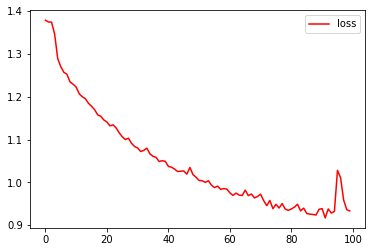

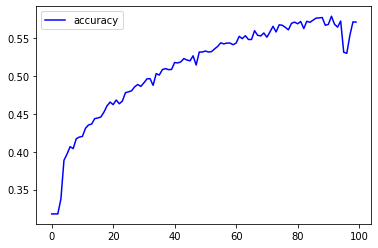

In [ ]:
hist = pd.DataFrame(history.history)
print(hist.head())
plt.figure()
plt.plot(hist['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2VecCBOW


In [61]:
dict_cbow = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecCBOW/Dictionary.csv')
new_columns = dict_cbow.columns.values
new_columns[0] = 'Month'
dict_cbow.columns = new_columns
dict_cbow = dict_cbow.set_index('Month')
dict_cbow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,0.054010,-0.116635,-0.615176,0.053264,0.270385,-0.034695,0.660015,0.435280,-0.167341,0.072743,-0.081690,-0.199493,0.041174,0.343824,0.363869,-0.056462,0.333451,-0.031356,-0.219526,0.017895,0.192430,0.360702,0.250293,0.447572,-0.409847,0.362227,-0.055411,0.018955,-0.317367,-0.007409,0.145666,-0.009043,-0.041776,0.302149,0.602522,-0.472846,0.086138,0.475878,-0.056626,-0.303826,...,0.593062,-0.235644,-0.358872,0.059637,0.143638,-0.284239,0.377261,0.162162,0.523762,-0.398577,0.280657,0.533163,-0.161320,0.406426,-0.115575,-0.182342,-0.224664,0.173816,-0.139930,-0.542530,0.435035,-0.371732,0.284868,0.788156,-0.105276,0.208798,0.036610,0.869398,-0.072490,0.438198,-0.095018,0.083041,0.114968,0.319551,0.164187,0.009881,-0.315001,0.081630,-0.110300,-0.092392
the,-0.852750,0.432507,-0.289424,0.795800,0.023257,0.050553,-0.830053,-0.742640,-0.421492,0.356275,-0.170520,0.668634,-0.030951,0.300104,0.861248,0.583642,0.428347,0.120406,0.106232,0.625573,1.054794,0.543136,0.728656,0.110497,-0.630705,-0.065428,-0.368490,-0.886051,-0.680582,0.173473,0.158773,0.402065,-0.398248,-0.212494,0.249046,-0.135494,1.107102,0.753997,0.078687,0.289999,...,0.708970,-1.197734,-0.103120,-0.890021,-0.476998,0.471254,-0.151074,0.949742,0.493666,0.069152,0.603835,0.461832,-0.410488,-0.247846,0.159008,-0.021451,-0.259697,0.255975,-0.038003,-0.400884,-0.106482,0.134460,-0.114582,0.085091,0.074969,-0.807609,-0.890234,-0.814566,-0.042241,-0.848224,-0.292800,0.834626,-0.036491,0.225063,0.557594,-0.570594,0.167689,0.379619,-0.497976,0.392273
fuck,0.167770,0.119974,0.302141,-0.200799,-0.266057,-0.301892,0.327918,0.003196,0.631058,0.265193,-0.137870,0.084515,0.252873,0.114272,-0.339069,-0.215894,0.175621,0.142763,-0.258152,0.352802,-0.115566,0.008143,0.032092,0.359854,0.236001,-0.119994,-0.050785,0.277579,0.345362,0.277167,-0.202077,0.301460,0.385830,-0.000850,-0.164581,0.036501,-0.155205,-0.110175,-0.177312,-0.300878,...,0.198516,0.242411,0.014289,0.190846,-0.261074,-0.387869,0.561773,-0.258857,-0.396569,-0.498835,-0.031231,-0.339743,0.739089,0.276680,0.319858,-0.314116,-0.156372,0.113372,-0.133390,0.106388,0.309260,-0.069228,0.124728,0.039303,0.127196,0.034494,0.119910,0.065314,0.143028,0.125673,-0.120518,0.184570,0.115688,-0.376349,0.056164,-0.178325,-0.185697,0.060345,0.015507,0.100795
Who,-0.325103,-0.196605,-0.298863,0.149170,0.163655,-0.087753,-0.213542,0.291837,0.164022,-0.116587,-0.542942,0.247486,0.216051,0.229936,0.350848,-0.045564,-0.269089,-0.438484,0.234107,-0.018791,-0.182762,-0.040871,0.086698,-0.042436,-0.173498,0.061358,0.282062,-0.279571,0.259520,0.427197,0.396517,0.254424,0.165994,0.384576,0.001214,-0.237645,0.194899,0.131192,-0.271535,0.312612,...,-0.101488,0.134374,0.092284,0.318618,-0.403911,-0.438786,0.164501,-0.296264,-0.047216,0.052797,0.225831,0.183170,0.146559,-0.707248,0.749275,-0.431474,-0.279717,0.291325,0.107159,-0.226957,-0.515657,0.276505,0.465150,-0.442732,-0.185686,0.097060,-0.655621,0.246724,0.271543,0.208196,-0.116989,-0.197150,-0.225224,0.185783,0.099388,0.755426,-0.080447,0.143895,-0.020569,0.288599
heck,-0.310433,-0.150483,-0.100078,0.142485,-0.116532,-0.477134,-0.096097,-0.026066,-0.424769,0.585560,-0.550719,-0.189389,0.392410,0.529350,-0.099750,-0.644823,-0.513343,-0.095281,-0.238755,-0.510876,0.672031,0.622922,-0.179614,0.036672,0.037292,0.425749,0.870473,0.566797,0.636458,0.484237,-0.403266,0.132335,0.241753,0.331775,-0.010263,0.228108,-0.179902,-0.232239,-0.223587,0.693765,...,-0.009714,0.384201,-0.249755,0.136071,0.558143,-0.222694,0.456705,0.216483,-0.225993,-0.234217,-0.101956,-0.009981,0.473864,-0.290551,0.462595,-0.321715,-0.132509,-0.054560,0.328517,-0.189278,-0.729748,0.679507,0.579922,-0.015003,0.65

In [62]:
dict_cbow.iloc[1].values

array([-0.85274953,  0.43250686, -0.28942442,  0.79579973,  0.02325693,
        0.05055321, -0.83005339, -0.7426399 , -0.42149204,  0.35627496,
       -0.17051983,  0.6686337 , -0.03095101,  0.3001045 ,  0.86124814,
        0.58364159,  0.42834666,  0.12040621,  0.10623246,  0.6255734 ,
        1.05479407,  0.54313564,  0.7286557 ,  0.11049717, -0.63070494,
       -0.06542764, -0.36848953, -0.88605124, -0.68058169,  0.17347264,
        0.1587728 ,  0.40206516, -0.39824831, -0.21249367,  0.24904564,
       -0.13549401,  1.1071018 ,  0.75399655,  0.07868659,  0.28999907,
        0.42086518, -0.41190037, -0.11232718,  0.38995081,  0.02994548,
       -0.9930017 ,  0.58520281, -0.18855126, -0.29330397, -1.11405098,
       -0.54171312,  1.00253499, -0.55134761, -0.16087891,  0.79052943,
       -0.30076498,  0.70897043, -1.19773448, -0.10312049, -0.89002138,
       -0.47699752,  0.47125438, -0.15107363,  0.94974172,  0.49366617,
        0.06915207,  0.60383505,  0.46183211, -0.41048777, -0.24

In [63]:
 cbow_dict = {}
 for word,ind in zip(dict_cbow.index,range(len(dict_cbow))):
     cbow_dict[word] = dict_cbow.iloc[ind].values

In [64]:
cbow_dict['How']

array([ 0.05400974, -0.11663481, -0.61517572,  0.05326403,  0.27038541,
       -0.03469465,  0.66001517,  0.4352797 , -0.1673414 ,  0.07274283,
       -0.08168963, -0.19949317,  0.04117402,  0.34382391,  0.36386943,
       -0.05646186,  0.33345124, -0.03135552, -0.21952552,  0.01789539,
        0.19243017,  0.36070228,  0.25029302,  0.44757172, -0.40984675,
        0.36222714, -0.05541066,  0.01895536, -0.31736669, -0.00740933,
        0.14566596, -0.00904256, -0.04177569,  0.30214909,  0.60252196,
       -0.47284594,  0.08613777,  0.47587761, -0.05662649, -0.3038263 ,
        0.40591308,  0.12595624,  0.03210615,  0.07017876, -0.25262576,
        0.36623588, -0.03784815, -0.77350724,  0.111642  , -0.05801553,
       -0.12664391,  0.22215991,  0.27096176, -0.20753545, -0.1444246 ,
        0.13647172,  0.59306175, -0.23564386, -0.35887215,  0.0596365 ,
        0.14363845, -0.28423908,  0.37726134,  0.16216175,  0.52376187,
       -0.39857706,  0.2806569 ,  0.53316277, -0.16131985,  0.40

In [65]:
cbow_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  cbow_tweetseq.append(temp)

In [66]:
test_cbow_tweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  test_cbow_tweetseq.append(temp)

In [67]:
len(cbow_tweetseq[0][-1])

96

In [68]:
cbow_training_padded = np.array(cbow_tweetseq)
labels = list(df_train['Encoding'])
cbow_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(cbow_training_padded.shape)

(3613, 63, 96)


In [69]:
cbow_test_padded = np.array(test_cbow_tweetseq)
cbow_test_labels = list(df_train['Encoding'])
cbow_test_labels = np.array(cbow_test_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(cbow_test_padded.shape)

(3142, 63, 96)


In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(63,96)))
model1.add(tf.keras.layers.LSTM(10))
# model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(4, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [ ]:
history1 = model1.fit(cbow_training_padded,cbow_training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 3s 23ms/step - loss: 1.3786 - accuracy: 0.3147
Epoch 2/100
113/113 [==============================] - 3s 22ms/step - loss: 1.3314 - accuracy: 0.3451
Epoch 3/100
113/113 [==============================] - 2s 20ms/step - loss: 1.2779 - accuracy: 0.3994
Epoch 4/100
113/113 [==============================] - 2s 20ms/step - loss: 1.2481 - accuracy: 0.4171
Epoch 5/100
113/113 [==============================] - 2s 21ms/step - loss: 1.2006 - accuracy: 0.4345
Epoch 6/100
113/113 [==============================] - 2s 20ms/step - loss: 1.1682 - accuracy: 0.4459
Epoch 7/100
113/113 [==============================] - 2s 21ms/step - loss: 1.1277 - accuracy: 0.4550
Epoch 8/100
113/113 [==============================] - 2s 21ms/step - loss: 1.1078 - accuracy: 0.4617
Epoch 9/100
113/113 [==============================] - 2s 21ms/step - loss: 1.0809 - accuracy: 0.4686
Epoch 10/100
113/113 [==============================] - 2s 21ms/step - loss: 1.059

In [ ]:
cbow_pred = model1.predict(cbow_test__padded)

In [ ]:
print(cbow_pred)
print(type(cbow_pred))
cbow_predicts = []
for i in cbow_pred:
  cbow_predicts.append(np.argmax(i)+1)

print(cbow_predicts)
print(accuracy_score(y_true,cbow_predicts))

[[0.06464279 0.00782247 0.00492022 0.9226146 ]
 [0.05520034 0.00910513 0.00610595 0.92958856]
 [0.00989692 0.47704408 0.4986278  0.01443118]
 ...
 [0.00970314 0.4771913  0.49892646 0.01417917]
 [0.8608957  0.02499139 0.013007   0.10110592]
 [0.14903924 0.38664952 0.35153893 0.11277226]]
<class 'numpy.ndarray'>
[4, 4, 3, 3, 1, 4, 4, 4, 3, 1, 1, 3, 4, 1, 3, 4, 3, 3, 3, 3, 3, 2, 1, 1, 3, 4, 3, 3, 1, 4, 3, 4, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 4, 4, 3, 1, 4, 1, 3, 3, 4, 3, 4, 2, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 1, 4, 3, 3, 4, 1, 4, 4, 4, 3, 1, 3, 4, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 1, 4, 3, 3, 1, 1, 3, 3, 4, 3, 1, 3, 3, 1, 4, 4, 3, 3, 3, 1, 4, 4, 1, 1, 1, 3, 4, 4, 3, 1, 4, 3, 3, 3, 3, 1, 4, 3, 3, 3, 1, 3, 4, 1, 4, 3, 4, 3, 3, 4, 1, 1, 4, 4, 3, 4, 3, 1, 1, 3, 3, 3, 4, 1, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 1, 1, 2, 4, 3, 3, 3, 4, 3, 3, 3, 1, 4, 4, 1, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 1, 4, 4, 3, 4, 4, 3, 1, 3, 3, 3, 4, 3, 4, 3, 4, 1, 3, 3, 4, 4, 3, 3, 1, 3, 

       loss  accuracy
0  1.378559  0.314697
1  1.331442  0.345143
2  1.277851  0.399391
3  1.248063  0.417105
4  1.200591  0.434542


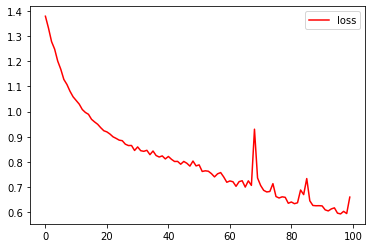

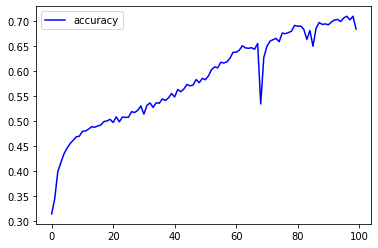

In [ ]:
hist1 = pd.DataFrame(history1.history)
print(hist1.head())
plt.figure()
plt.plot(hist1['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist1['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2vec Skip Gram

In [73]:
dict_sg = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecSG/Dictionary.csv')
new_columns = dict_sg.columns.values
new_columns[0] = 'Month'
dict_sg.columns = new_columns
dict_sg = dict_sg.set_index('Month')
dict_sg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,-0.203717,-0.150630,0.223585,0.215566,-0.186923,-0.051414,-0.235733,0.216528,0.255101,-0.251852,-0.108214,-0.071792,-0.068948,-0.217464,-0.250711,0.105806,-0.234507,-0.207686,0.230530,-0.246797,-0.220502,-0.229190,-0.109182,-0.173445,0.116008,-0.087733,0.080736,-0.004632,0.083626,0.137413,-0.225589,-0.179994,-0.236807,-0.084119,-0.054510,-0.134893,0.075126,-0.270162,-0.210055,0.084020,...,0.140968,-0.019526,0.158348,-0.193825,-0.099673,-0.071462,-0.103296,-0.219433,-0.129872,-0.138563,0.203733,0.214830,0.225828,-0.082976,-0.225244,-0.222924,-0.164140,0.228306,-0.055822,0.202472,-0.094650,0.229337,-0.171653,-0.145441,-0.219568,0.210826,-0.253136,-0.229341,0.215176,-0.081329,0.185032,0.198724,-0.238400,0.089491,0.237074,0.082362,0.086279,-0.115474,0.217634,-0.075145
the,-0.020249,-0.055581,0.058226,0.067357,0.102056,-0.165884,-0.078265,0.011241,0.068224,-0.082592,-0.096399,-0.095939,-0.249901,-0.066374,-0.019906,0.327215,-0.085710,-0.013414,0.497962,-0.128527,-0.041930,-0.003189,-0.091269,-0.032244,-0.046544,-0.014560,0.032479,0.217771,0.320780,0.382624,-0.083751,-0.015238,-0.108565,0.089491,-0.325286,-0.051725,0.077845,-0.124761,-0.006340,0.345667,...,-0.024750,0.049666,0.117801,-0.103719,-0.039352,-0.036507,-0.098277,-0.024551,-0.084965,0.082354,0.411697,0.445715,0.037352,-0.207209,-0.067787,-0.021426,-0.282057,0.084286,0.036562,0.105133,-0.275389,0.103467,-0.167495,-0.151169,-0.083688,0.059127,-0.047398,-0.052026,0.009183,-0.070239,0.341254,0.030170,-0.062044,0.151679,0.091647,0.405472,0.359599,-0.035385,0.089669,-0.233588
fuck,0.172204,0.220389,-0.264518,-0.220649,0.204303,0.123914,0.201423,-0.205846,-0.209254,0.156696,0.116075,0.080623,0.107220,0.145527,0.219829,-0.093038,0.309331,0.203282,0.018761,0.235756,0.215612,0.173753,0.161190,0.196485,-0.154591,0.209825,-0.228355,-0.268911,-0.123805,-0.080290,0.229006,0.219902,0.176710,0.299666,0.136986,-0.237599,-0.150431,0.194967,0.201927,-0.120245,...,-0.231463,0.225672,-0.171749,0.188649,0.204998,0.143026,0.153958,0.233967,-0.254732,0.192764,-0.023718,0.041446,-0.196634,0.144821,0.223328,0.163337,-0.157733,-0.197622,0.287350,-0.212386,0.143569,-0.150554,-0.133090,0.051374,0.200745,-0.239494,0.226291,0.247036,-0.211476,0.142916,-0.000605,-0.198903,0.238517,-0.287782,-0.164459,-0.098404,-0.257718,0.132124,-0.208409,0.088058
Who,0.165534,0.125423,-0.107816,-0.152515,0.116251,0.130986,0.145456,-0.174382,-0.133706,0.124085,0.138719,0.098512,0.155907,0.147397,0.168194,-0.107032,0.161260,0.114801,0.003562,0.162068,0.152181,0.167083,0.138048,0.172092,-0.123444,0.123377,-0.128412,-0.108242,-0.144372,-0.126256,0.119656,0.140144,0.177066,0.153316,0.115564,-0.051353,-0.137380,0.157938,0.141982,-0.103739,...,-0.145492,0.139002,-0.128389,0.141588,0.121400,0.132507,0.133157,0.140291,-0.071448,0.108176,-0.000131,-0.024701,-0.160432,0.114939,0.160464,0.141475,-0.003681,-0.128370,0.131249,-0.135424,0.121098,-0.161445,0.042588,0.076072,0.128665,-0.149823,0.154419,0.122090,-0.148230,0.125169,-0.041957,-0.143731,0.091284,-0.093439,-0.119944,-0.107194,-0.102921,0.138282,-0.149017,0.124798
heck,0.131980,0.142158,-0.151761,-0.150958,0.117151,0.101149,0.153567,-0.129345,-0.158239,0.122661,0.138580,0.109282,0.128112,0.142298,0.136731,-0.114137,0.177010,0.158514,-0.034056,0.125972,0.115827,0.115073,0.102156,0.131441,-0.130387,0.120186,-0.142124,-0.151644,-0.098391,-0.108382,0.144654,0.112785,0.134998,0.175472,0.099318,-0.115947,-0.141044,0.131650,0.140304,-0.126614,...,-0.162463,0.158608,-0.116448,0.124437,0.114633,0.123475,0.105641,0.140578,-0.129072,0.127105,-0.015039,0.000366,-0.120594,0.116885,0.142377,0.114756,-0.113968,-0.142936,0.123577,-0

In [74]:
sg_dict = {}
for word,ind in zip(dict_sg.index,range(len(dict_sg))):
    sg_dict[word] = dict_sg.iloc[ind].values

print(sg_dict['the'].shape)

(256,)


In [75]:
sg_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*256)
    else:
      temp.append([0]*256)
    
  sg_tweetseq.append(temp)

In [76]:
test_sg_tweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*256)
    else:
      temp.append([0]*256)
    
  test_sg_tweetseq.append(temp)

In [77]:
sg_training_padded = np.array(sg_tweetseq)
labels = list(df_train['Encoding'])
sg_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)""
print(sg_training_padded.shape)

(3613, 63, 256)


In [78]:
sg_test_padded = np.array(test_sg_tweetseq)
sg_test_labels = list(df_train['Encoding'])
sg_test_labels = np.array(sg_test_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(sg_test_padded.shape)

(3142, 63, 256)


In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(63,256)))
model2.add(tf.keras.layers.LSTM(20))
# model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [ ]:
history2 = model2.fit(sg_training_padded,sg_training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3784 - accuracy: 0.3158
Epoch 2/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3746 - accuracy: 0.3177
Epoch 3/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3651 - accuracy: 0.3186
Epoch 4/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3586 - accuracy: 0.3272
Epoch 5/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3525 - accuracy: 0.3280
Epoch 6/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3411 - accuracy: 0.3432
Epoch 7/100
113/113 [==============================] - 3s 26ms/step - loss: 1.3307 - accuracy: 0.3612
Epoch 8/100
113/113 [==============================] - 3s 26ms/step - loss: 1.3207 - accuracy: 0.3634
Epoch 9/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3061 - accuracy: 0.3687
Epoch 10/100
113/113 [==============================] - 3s 26ms/step - loss: 1.271

In [ ]:
sg_pred = model2.predict(sg_test_padded)

In [ ]:
print(sg_pred)
print(type(sg_pred))
sg_predicts = []
for i in sg_pred:
  sg_predicts.append(np.argmax(i)+1)

print(sg_predicts)
print(accuracy_score(y_true,sg_predicts))

[[0.0061149  0.00671074 0.00903049 0.9781439 ]
 [0.00647045 0.00751016 0.00992371 0.9760957 ]
 [0.08041856 0.53706425 0.37376252 0.00875466]
 ...
 [0.18770951 0.51724225 0.2828599  0.01218836]
 [0.7769083  0.10056006 0.07094504 0.05158659]
 [0.23002529 0.4900059  0.26677367 0.01319521]]
<class 'numpy.ndarray'>
[4, 4, 2, 3, 1, 4, 4, 4, 2, 1, 4, 2, 4, 1, 3, 4, 3, 1, 2, 2, 2, 1, 1, 1, 3, 4, 3, 2, 2, 4, 3, 4, 1, 1, 2, 1, 2, 1, 3, 3, 2, 1, 1, 4, 2, 1, 4, 4, 2, 2, 4, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 2, 2, 4, 1, 1, 2, 3, 4, 4, 2, 2, 4, 4, 1, 4, 2, 2, 4, 2, 4, 4, 1, 2, 1, 2, 4, 1, 3, 4, 3, 3, 2, 2, 3, 2, 2, 1, 4, 2, 3, 1, 4, 2, 1, 4, 2, 4, 1, 2, 1, 4, 4, 2, 3, 2, 2, 4, 4, 1, 1, 1, 2, 4, 4, 2, 1, 4, 1, 2, 2, 4, 1, 4, 2, 3, 3, 2, 2, 4, 1, 4, 1, 4, 4, 2, 4, 1, 1, 4, 4, 3, 2, 2, 2, 1, 3, 3, 2, 4, 1, 1, 3, 3, 1, 4, 2, 3, 4, 2, 4, 2, 1, 1, 1, 1, 2, 3, 2, 4, 2, 2, 2, 4, 4, 1, 1, 2, 2, 4, 1, 3, 4, 4, 3, 3, 4, 4, 4, 2, 2, 3, 4, 4, 1, 4, 4, 2, 4, 4, 1, 4, 2, 2, 2, 1, 2, 4, 4, 4, 1, 2, 1, 4, 4, 2, 3, 1, 3, 

       loss  accuracy
0  1.377859  0.308054
1  1.374957  0.317741
2  1.374820  0.317741
3  1.374731  0.317741
4  1.375485  0.317741


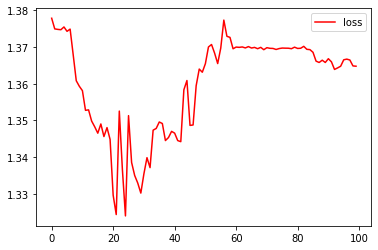

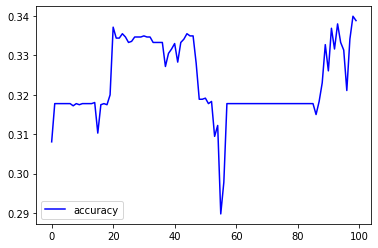

In [ ]:
hist2 = pd.DataFrame(history2.history)
print(hist2.head())
plt.figure()
plt.plot(hist2['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist2['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#All test data

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Test/clean_all_test.csv')

In [ ]:
df_test.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,At the point today where if someone says somet...,0.319,anger
1,1,IT S GAME DAY T MINUS 14Happy ...,0.144,anger
2,2,This game has pissed me off more than any othe...,0.898,anger
3,3,I have just found out it is Candice and not C...,0.271,anger
4,4,if he cannot come to my Mum a 60th after ...,0.646,anger


#RNN


In [56]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(63,25)))
model3.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(4, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [57]:
history = model3.fit(training_padded,training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3824 - accuracy: 0.3039
Epoch 2/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3733 - accuracy: 0.3141
Epoch 3/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3747 - accuracy: 0.3150
Epoch 4/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3709 - accuracy: 0.3227
Epoch 5/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3710 - accuracy: 0.3238
Epoch 6/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3700 - accuracy: 0.3166
Epoch 7/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3711 - accuracy: 0.3147
Epoch 8/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3688 - accuracy: 0.3172
Epoch 9/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3631 - accuracy: 0.3208
Epoch 10/100
113/113 [==============================] - 1s 12ms/step - loss: 1.365

In [70]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.Input(shape=(63,96)))
model4.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(4, activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [72]:
history4 = model4.fit(cbow_training_padded,cbow_training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.3593 - accuracy: 0.3269
Epoch 2/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3551 - accuracy: 0.3186
Epoch 3/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3557 - accuracy: 0.3186
Epoch 4/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3615 - accuracy: 0.3139
Epoch 5/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3675 - accuracy: 0.3183
Epoch 6/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3733 - accuracy: 0.3078
Epoch 7/100
113/113 [==============================] - 2s 13ms/step - loss: 1.3799 - accuracy: 0.3100
Epoch 8/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3779 - accuracy: 0.3114
Epoch 9/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3768 - accuracy: 0.3009
Epoch 10/100
113/113 [==============================] - 2s 13ms/step - loss: 1.374

In [79]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.Input(shape=(63,256)))
model5.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(4, activation='softmax'))

model5.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [80]:
history5 = model5.fit(sg_training_padded,sg_training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3836 - accuracy: 0.2945
Epoch 2/100
113/113 [==============================] - 2s 18ms/step - loss: 1.3738 - accuracy: 0.3175
Epoch 3/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3750 - accuracy: 0.3141
Epoch 4/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3722 - accuracy: 0.3222
Epoch 5/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3747 - accuracy: 0.3169
Epoch 6/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3718 - accuracy: 0.3133
Epoch 7/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3739 - accuracy: 0.3166
Epoch 8/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3728 - accuracy: 0.3172
Epoch 9/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3719 - accuracy: 0.3169
Epoch 10/100
113/113 [==============================] - 2s 17ms/step - loss: 1.372